In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete");

Setup Complete


In [100]:
comic = pd.read_csv('dc-wikia-data.csv', index_col = 'page_id')
comic

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
page_id,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [57]:
#checking the data types using the info function
comic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 431.1+ KB


In [58]:
# to check for missing values
comic.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [97]:
# the column GSM has 6832 null values. The amount of null values would not ensure i get accurate results or visualiztion
# and for this reason, the column would be removed.
comic.drop(columns='GSM', inplace=True)

In [98]:
comic.columns

Index(['name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE',
       'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [61]:
# select the align column
comic.ALIGN

0       Good Characters
1       Good Characters
2       Good Characters
3       Good Characters
4       Good Characters
             ...       
6891    Good Characters
6892    Good Characters
6893    Good Characters
6894    Good Characters
6895     Bad Characters
Name: ALIGN, Length: 6896, dtype: object

In [62]:
# select the index of 601
comic.ALIGN.iloc[601]

nan

In [63]:
# replace the NaN values of ALIGN with unknown
comic.fillna(value={"ALIGN": "Unknown"},inplace =True)

In [64]:
comic.ALIGN.iloc[601]

'Unknown'

In [65]:
#replace the NaN values of ID with unknown id
comic.fillna(value={"ID": "Unknown ID"},inplace =True)

In [66]:
comic.ID.iloc[2013]

'Unknown ID'

In [67]:
comic.EYE

0        Blue Eyes
1        Blue Eyes
2       Brown Eyes
3       Brown Eyes
4        Blue Eyes
           ...    
6891           NaN
6892           NaN
6893           NaN
6894           NaN
6895     Blue Eyes
Name: EYE, Length: 6896, dtype: object

In [68]:
# replace the NaN values of EYE column with unknown eye colour
comic.fillna(value={"EYE": "Unknown eye colour"},inplace =True)

In [69]:
comic.EYE.iloc[6891]

'Unknown eye colour'

In [70]:
comic.HAIR

0       Black Hair
1       Black Hair
2       Brown Hair
3       White Hair
4       Black Hair
           ...    
6891           NaN
6892           NaN
6893           NaN
6894           NaN
6895    Blond Hair
Name: HAIR, Length: 6896, dtype: object

In [71]:
# Replace the Nan values with unknown hair colour
comic.fillna(value={"HAIR": "Unknown hair colour"},inplace =True)

In [72]:
comic.HAIR.iloc[6891]

'Unknown hair colour'

In [73]:
# Replace the Nan values of sex column with unknown sex
comic.fillna(value={"SEX": "Unknown sex"},inplace =True)

In [74]:
# check if there are still null values
comic.SEX.isnull().sum()

0

In [75]:
# Replace the Nan values of alive column with deceased characters
comic.fillna(value={"ALIVE": "Deceased characters"},inplace =True)


In [76]:
# To check if there are still null values in the alive column
comic.ALIVE.isnull().sum()

0

In [77]:
# select the appearance column
comic.APPEARANCES

0       3093.0
1       2496.0
2       1565.0
3       1316.0
4       1237.0
         ...  
6891       NaN
6892       NaN
6893       NaN
6894       NaN
6895       NaN
Name: APPEARANCES, Length: 6896, dtype: float64

In [78]:
p=comic.loc[comic['APPEARANCES'].isnull()]
p.index

Int64Index([6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550,
            ...
            6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895],
           dtype='int64', length=355)

In [79]:
# Replace the Nan values of apperances column with unknown
comic.fillna(value={"APPEARANCES": "Unknown"},inplace =True)


In [80]:
comic.APPEARANCES.iloc[6895]

'Unknown'

In [81]:
comic['FIRST APPEARANCE']

0            1939, May
1        1986, October
2        1959, October
3       1987, February
4          1940, April
             ...      
6891               NaN
6892               NaN
6893               NaN
6894               NaN
6895               NaN
Name: FIRST APPEARANCE, Length: 6896, dtype: object

In [82]:
# Replace the Nan values of 'first apperance' column with unknown
comic.fillna(value={"FIRST APPEARANCE": "Unknown"},inplace =True)


In [83]:
from datetime import datetime
import dateutil.parser

In [85]:
comic['FIRST APPEARANCE'].dtype

dtype('O')

In [86]:
# some rows in 'FIRST APPEARANCE' column have unknown datatype, which results in error while trying to convert to datetime
invalid_row = comic.loc[comic['FIRST APPEARANCE'] == '1988, Holiday']
invalid_row

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
4179,4728,Fidel Castro (New Earth),\/wiki\/Fidel_Castro_(New_Earth),Unknown ID,Unknown,Unknown eye colour,Unknown hair colour,Male Characters,Living Characters,4.0,"1988, Holiday",1988.0
5346,4935,Sally Milton (New Earth),\/wiki\/Sally_Milton_(New_Earth),Public Identity,Unknown,Auburn Hair,Unknown hair colour,Female Characters,Living Characters,2.0,"1988, Holiday",1988.0


In [92]:
# to delete the rows
comic.drop([4728,4935], inplace = True)

In [93]:
#comic['FIRST APPEARANCE'].iloc[4728]

'1986'

In [95]:
time_date = 'FIRST APPEARANCE'
comic[time_date] = pd.to_datetime(comic[time_date])

In [99]:
comic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 1422 to 150660
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              6894 non-null   object        
 1   urlslug           6894 non-null   object        
 2   ID                4882 non-null   object        
 3   ALIGN             6295 non-null   object        
 4   EYE               3267 non-null   object        
 5   HAIR              4622 non-null   object        
 6   SEX               6769 non-null   object        
 7   ALIVE             6891 non-null   object        
 8   APPEARANCES       6539 non-null   float64       
 9   FIRST APPEARANCE  6825 non-null   datetime64[ns]
 10  YEAR              6825 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 430.9+ KB


<AxesSubplot:xlabel='APPEARANCES', ylabel='SEX'>

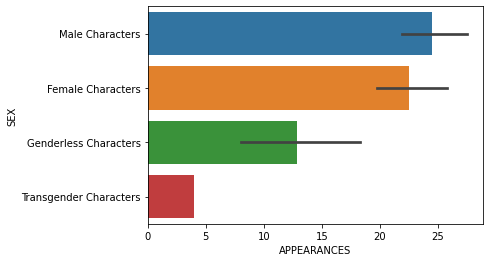

In [101]:
# to visualize using bar plot.
# to check which sex of characters appeared the most
sns.barplot(x='APPEARANCES',y = 'SEX', data= comic)



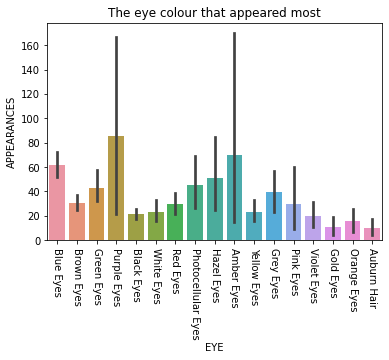

In [122]:
# which eye colour appeared the most?
eye_ = sns.barplot(y='APPEARANCES', x= 'EYE', data = comic)
eye_.set(title ='The eye colour that appeared most')
eye_.set_xticklabels(eye_.get_xticklabels(), rotation = -90);

[Text(0.5, 1.0, 'Comparison of the Living Characters and the Deceased Characters')]

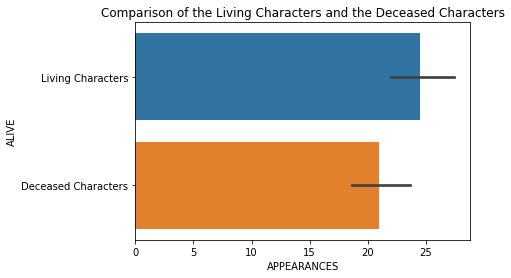

In [114]:
# the difference between living and deceased characters 
diff = sns.barplot(x='APPEARANCES', y= 'ALIVE', data = comic)
diff.set(title ='Comparison of the Living Characters and the Deceased Characters')

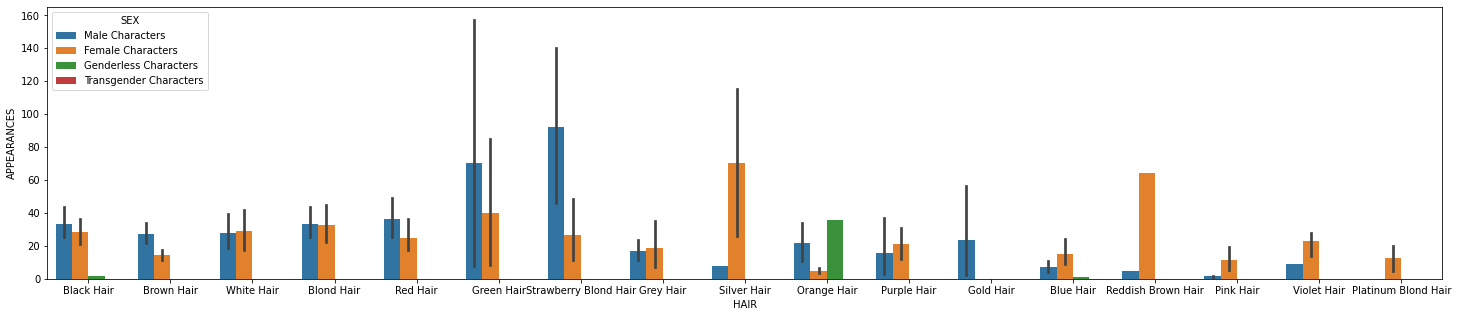

In [123]:
fig = plt.figure(figsize = (25, 5))
 
# the hair colour that appeared the most in relation to the sex of the characters
sns.barplot(x = 'HAIR',y = 'APPEARANCES',hue='SEX',data = comic)
plt.title=('Hair and Appearances')